## Згенерувати нормальний закон розподілу


In [1]:
import numpy as np
from numpy.random import uniform, seed
from numpy.typing import NDArray
from typing import Tuple, Union

def random_nums(size: int = None, interval: Tuple[float, float] = (0.0, 1.0)) -> Union[float, NDArray]:
    """Generate random numbers from interval"""
    return uniform(*interval, size)

In [2]:
# A and C parameters for generating
A = 5**13
C = 2**31
# Number of generating
N = 10000

def steady(size: int, a: int, c: int):
    """Generator of uniform distribution"""
    # Initialize array for z
    z = np.empty(size)
    
    # Initialize first value
    z[0] = random_nums(interval=(0, c))
    
    # Generate the rest of z
    for i in range(1, size):
        z[i] = (a * z[i - 1]) % c
    
    # Normalize z to be in the interval [0, 1)
    x = z / c
    
    return x

def density_steady(x):
    return np.where((0. <= x) & (x <= 1.), 1., 0.)
    

# Our generated values
x_uniform = steady(N, A, C)
print("Normal generated number:", x_uniform[:5])  
print("Min and max values:", min(x_uniform), max(x_uniform))

Normal generated number: [0.03206293 0.06959761 0.21526435 0.9607636  0.11629367]
Min and max values: 0.00025534629821777344 0.9999778270721436


In [3]:
# Number of intervals
bins_num = 20
# Minimum number of interval
min_number = 5

counts, edges = np.histogram(x_uniform, bins=bins_num)
print("Number of values in each interval:")
print("- before merging", counts)

# Merging intervals
accumulated_count, bin_edges = 0, [edges[0]]
for new_count, edge in zip(counts, edges[1:]):
    accumulated_count += new_count
    if accumulated_count >= min_number:
        bin_edges.append(edge)
        accumulated_count = 0
if counts[-1] < min_number:
    bin_edges.pop(-1)
    bin_edges.append(edges[-1])


new_intervals, _ = np.histogram(x_uniform, bins=bin_edges)
print("- after merging", new_intervals)

Number of values in each interval:
- before merging [501 499 486 470 515 467 535 465 498 497 468 495 527 526 544 501 506 505
 514 481]
- after merging [501 499 486 470 515 467 535 465 498 497 468 495 527 526 544 501 506 505
 514 481]


Mean of distribution:  0.5033008095249402
Variance of distribution: 0.08302367649945253


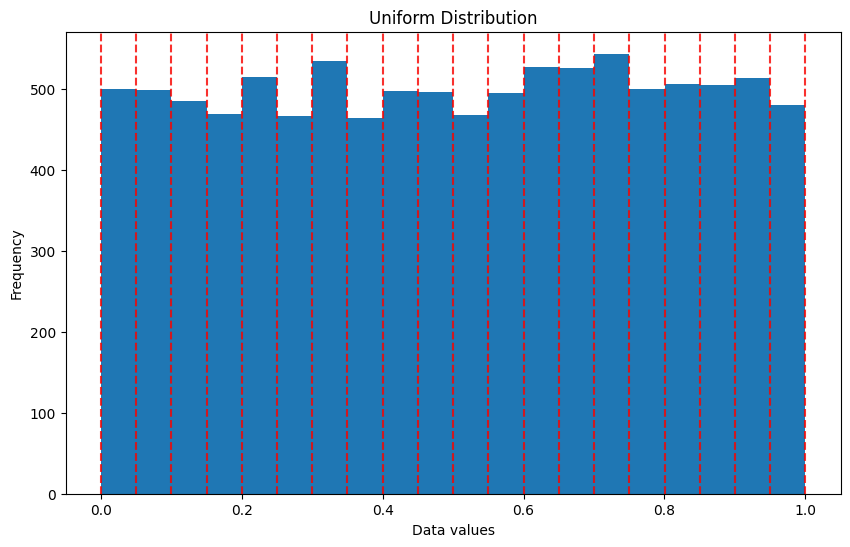

In [4]:
from matplotlib import pyplot as plt
from statistics import mean, variance, stdev

plt.figure(figsize=(10, 6))
plt.title("Uniform Distribution")
plt.hist(x_uniform, bins=bin_edges)


_, special_edges = np.histogram(x_uniform, bins=bins_num)
for edge in special_edges:
    plt.axvline(edge, color='green', linestyle='--', alpha=0.1)
    
    
# Plot vertical lines at the bin edges
for edge in bin_edges:
    plt.axvline(edge, color='red', linestyle='--', alpha=0.8)
    
print("Mean of distribution: ", mean(x_uniform))
print("Variance of distribution:", variance(x_uniform))

plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Calculating chi squared
# Calculating middles and width of intervals
bin_mids = np.array([(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)])
bin_width = np.array([bin_edges[i+1] - bin_edges[i] for i in range(len(bin_edges) - 1)])

In [6]:
# Determine the expected probability and theoretical values
expected_prob = density_steady(bin_mids) * bin_width
theoretical_values = 10000 * expected_prob
print("Theoretical values")
for value in theoretical_values:
    print(int(value), end=' ')

Theoretical values
499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 499 

In [7]:
from scipy.stats import chi2_contingency

data = [new_intervals, theoretical_values]
stat, p, dof, expected = chi2_contingency(data)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Two distributions are independent')
else:
    print('Two distributions are dependent')

p value is 0.9560762615417853
Two distributions are dependent
